<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.627630,69.991252,27.274628,89.439081,0.306924,283.639515,283.600917,0.038598
1,0.0,1.0,23.014400,91.550442,81.785280,50.876464,0.890614,258.117200,257.672043,0.445157
2,0.0,2.0,76.814965,82.334543,81.297525,89.347391,0.125780,339.920205,339.970936,-0.050732
3,0.0,3.0,74.368205,99.710805,28.978755,64.555957,-0.053445,277.560277,278.057857,-0.497580
4,0.0,4.0,93.359066,80.253078,80.940134,77.264876,-0.026502,341.790652,341.915242,-0.124591
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.137285,45.576260,39.131143,87.878006,0.972363,228.695058,227.991659,0.703399
59996,999.0,56.0,41.315672,37.592229,86.409497,39.938753,-2.443017,212.813133,215.329933,-2.516800
59997,999.0,57.0,21.362366,92.677789,23.638385,93.571889,1.201423,242.451852,241.722240,0.729612
59998,999.0,58.0,84.061856,71.976971,84.740453,50.514609,0.631360,301.925248,301.050535,0.874713


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.627630,69.991252,27.274628,89.439081,0.306924,283.639515,283.600917,0.038598
1,0.0,1.0,23.014400,91.550442,81.785280,50.876464,0.890614,258.117200,257.672043,0.445157
2,0.0,2.0,76.814965,82.334543,81.297525,89.347391,0.125780,339.920205,339.970936,-0.050732
3,0.0,3.0,74.368205,99.710805,28.978755,64.555957,-0.053445,277.560277,278.057857,-0.497580
4,0.0,4.0,93.359066,80.253078,80.940134,77.264876,-0.026502,341.790652,341.915242,-0.124591
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.137285,45.576260,39.131143,87.878006,0.972363,228.695058,227.991659,0.703399
59996,999.0,56.0,41.315672,37.592229,86.409497,39.938753,-2.443017,212.813133,215.329933,-2.516800
59997,999.0,57.0,21.362366,92.677789,23.638385,93.571889,1.201423,242.451852,241.722240,0.729612
59998,999.0,58.0,84.061856,71.976971,84.740453,50.514609,0.631360,301.925248,301.050535,0.874713


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.627630  69.991252  27.274628  89.439081  0.306924  283.639515   
      1.0    23.014400  91.550442  81.785280  50.876464  0.890614  258.117200   
      2.0    76.814965  82.334543  81.297525  89.347391  0.125780  339.920205   
      3.0    74.368205  99.710805  28.978755  64.555957 -0.053445  277.560277   
      4.0    93.359066  80.253078  80.940134  77.264876 -0.026502  341.790652   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   45.137285  45.576260  39.131143  87.878006  0.972363  228.695058   
      56.0   41.315672  37.592229  86.409497  39.938753 -2.443017  212.813133   
      57.0   21.362366  92.677789  23.638385  93.571889  1.201423  242.451852   
      58.0   84.061856  71.976971  84.740453  50.514609  0.631360  301.925248   
      59.0   65.091099  32.070242  75.490280  80.681029 -0.187030  263.145620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.600917  0.038598  
      1.0    257.672043  0.445157  
      2.0    339.970936 -0.050732  
      3.0    278.057857 -0.497580  
      4.0    341.915242 -0.124591  
...                 ...       ...  
999.0 55.0   227.991659  0.703399  
      56.0   215.329933 -2.516800  
      57.0   241.722240  0.729612  
      58.0   301.050535  0.874713  
      59.0   263.318406 -0.172786  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.627630  69.991252  27.274628  89.439081  0.306924  283.639515   
      1.0    23.014400  91.550442  81.785280  50.876464  0.890614  258.117200   
      2.0    76.814965  82.334543  81.297525  89.347391  0.125780  339.920205   
      3.0    74.368205  99.710805  28.978755  64.555957 -0.053445  277.560277   
      4.0    93.359066  80.253078  80.940134  77.264876 -0.026502  341.790652   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   45.137285  45.576260  39.131143  87.878006  0.972363  228.695058   
      56.0   41.315672  37.592229  86.409497  39.938753 -2.443017  212.813133   
      57.0   21.362366  92.677789  23.638385  93.571889  1.201423  242.451852   
      58.0   84.061856  71.976971  84.740453  50.514609  0.631360  301.925248   
      59.0   65.091099  32.070242  75.490280  80.681029 -0.187030  263.145620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.600917  0.038598  
      1.0    257.672043  0.445157  
      2.0    339.970936 -0.050732  
      3.0    278.057857 -0.497580  
      4.0    341.915242 -0.124591  
...                 ...       ...  
999.0 55.0   227.991659  0.703399  
      56.0   215.329933 -2.516800  
      57.0   241.722240  0.729612  
      58.0   301.050535  0.874713  
      59.0   263.318406 -0.172786  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.627630,69.991252,27.274628,89.439081,0.306924,283.639515,283.600917,0.038598
1,0.0,1.0,23.014400,91.550442,81.785280,50.876464,0.890614,258.117200,257.672043,0.445157
2,0.0,2.0,76.814965,82.334543,81.297525,89.347391,0.125780,339.920205,339.970936,-0.050732
3,0.0,3.0,74.368205,99.710805,28.978755,64.555957,-0.053445,277.560277,278.057857,-0.497580
4,0.0,4.0,93.359066,80.253078,80.940134,77.264876,-0.026502,341.790652,341.915242,-0.124591
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.137285,45.576260,39.131143,87.878006,0.972363,228.695058,227.991659,0.703399
59996,999.0,56.0,41.315672,37.592229,86.409497,39.938753,-2.443017,212.813133,215.329933,-2.516800
59997,999.0,57.0,21.362366,92.677789,23.638385,93.571889,1.201423,242.451852,241.722240,0.729612
59998,999.0,58.0,84.061856,71.976971,84.740453,50.514609,0.631360,301.925248,301.050535,0.874713


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.627630  69.991252  27.274628  89.439081  0.306924  283.639515   
      1.0    23.014400  91.550442  81.785280  50.876464  0.890614  258.117200   
      2.0    76.814965  82.334543  81.297525  89.347391  0.125780  339.920205   
      3.0    74.368205  99.710805  28.978755  64.555957 -0.053445  277.560277   
      4.0    93.359066  80.253078  80.940134  77.264876 -0.026502  341.790652   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   45.137285  45.576260  39.131143  87.878006  0.972363  228.695058   
      56.0   41.315672  37.592229  86.409497  39.938753 -2.443017  212.813133   
      57.0   21.362366  92.677789  23.638385  93.571889  1.201423  242.451852   
      58.0   84.061856  71.976971  84.740453  50.514609  0.631360  301.925248   
      59.0   65.091099  32.070242  75.490280  80.681029 -0.187030  263.145620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    283.600917  0.038598  
      1.0    257.672043  0.445157  
      2.0    339.970936 -0.050732  
      3.0    278.057857 -0.497580  
      4.0    341.915242 -0.124591  
...                 ...       ...  
999.0 55.0   227.991659  0.703399  
      56.0   215.329933 -2.516800  
      57.0   241.722240  0.729612  
      58.0   301.050535  0.874713  
      59.0   263.318406 -0.172786  

[60000 rows x 8 columns]

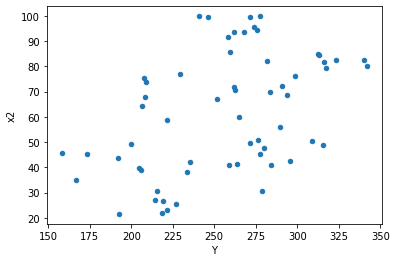

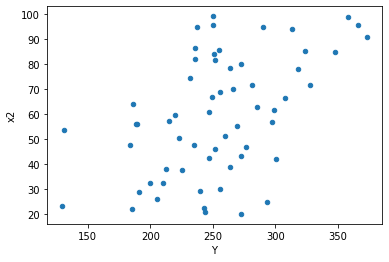

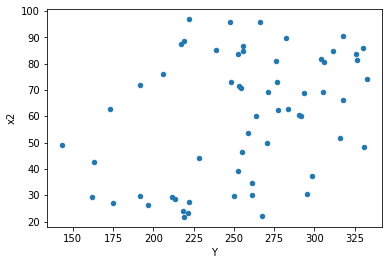

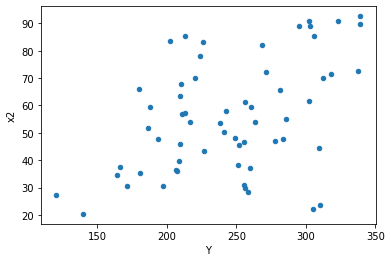

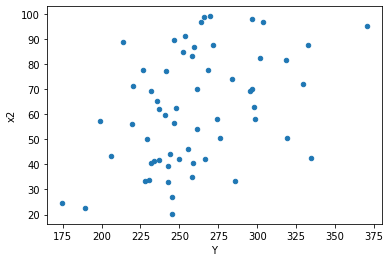

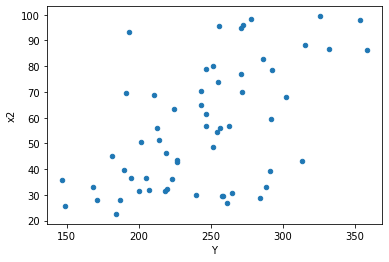

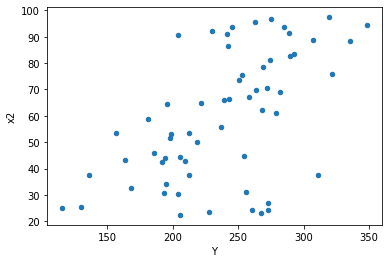

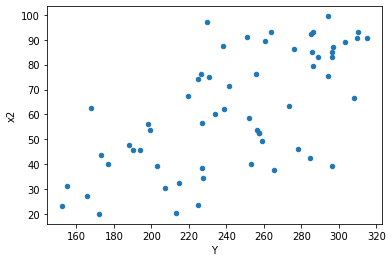

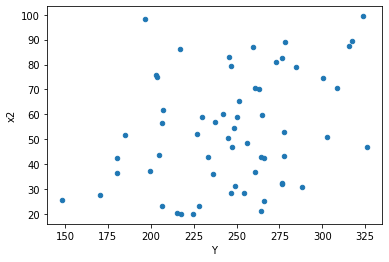

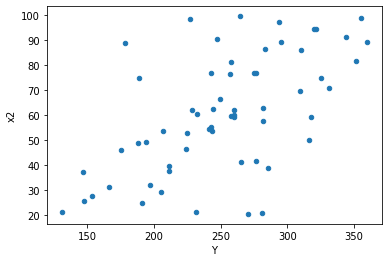

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,12.922068660902184,13.482155265613326,0.6461034330451092,0.6741077632806662,1.0433434165541755,0.9253509271251372,0.5373245364374314,0.4626754635625686,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,11.290384301385286,13.413041029888953,0.5645192150692643,0.6706520514944476,1.1880057110406088,0.7037926820135314,0.6481036589932343,0.3518963410067657,Reject001=1 : Homoscedasticity
9.0,20.0,20.0,13.986876548160424,15.85737050833352,0.6993438274080213,0.7928685254166761,1.1337320704685212,0.7817147120773362,0.6091426439613319,0.3908573560386681,Reject001=1 : Homoscedasticity
11.0,20.0,20.0,4.162767671007864,6.93682518421188,0.2081383835503932,0.346841259210594,1.666397390496784,0.2619732133044206,0.8690133933477897,0.1309866066522103,Reject001=1 : Homoscedasticity
12.0,20.0,20.0,6.1672259896252415,7.842193454134435,0.30836129948126206,0.39210967270672176,1.271591711950704,0.596139892819711,0.7019300535901445,0.2980699464098555,Reject001=1 : Homoscedasticity
14.0,20.0,20.0,8.451125323089428,15.486417490312293,0.4225562661544714,0.7743208745156147,1.8324680913205316,0.18430997173950736,0.9078450141302463,0.09215498586975368,Reject001=1 : Homoscedasticity
16.0,20.0,20.0,4.017897568463339,10.289378215354695,0.20089487842316694,0.5144689107677347,2.560886145061659,0.041291876055240984,0.9793540619723795,0.020645938027620492,Reject001=1 : Homoscedasticity
17.0,20.0,20.0,8.546036941712934,10.315361076209228,0.4273018470856467,0.5157680538104614,1.2070344589619404,0.6779760583574175,0.6610119708212913,0.33898802917870874,Reject001=1 : Homoscedasticity
19.0,20.0,20.0,3.221617541483751,10.892926082067184,0.16108087707418756,0.5446463041033592,3.381197780867039,0.008940516173234103,0.995529741913383,0.004470258086617052,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,11.896337598003585,5.070235049037147,0.5948168799001793,0.25351175245185736,0.4262013419901619,0.06341658828806318,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,12.922068660902184,13.482155265613326,0.6461034330451092,0.6741077632806662,1.0433434165541755,0.9253509271251372,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,12.951554369817153,5.3735614166455115,0.6475777184908577,0.2686780708322756,0.41489702804848544,0.055741248401731634,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,11.403369811702971,9.875577245754217,0.5701684905851485,0.49377886228771084,0.8660227116040013,0.7508518163785514,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,25.747210244542956,9.593043383533598,1.2873605122271479,0.47965216917667985,0.3725857400635012,0.03245462503590221,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,11.290384301385286,13.413041029888953,0.5645192150692643,0.6706520514944476,1.1880057110406088,0.7037926820135314,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,10.50568199113068,4.341497338684625,0.525284099556534,0.21707486693423123,0.41325230883153435,0.05467722256067584,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,9.356134057080384,6.963075633754289,0.4678067028540192,0.34815378168771444,0.7442257230682672,0.5149228775237602,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,16.840287187357017,5.0265101038118365,0.8420143593678509,0.2513255051905918,0.2984812579434827,0.009440825612006534,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      944
Reject001=0 : Heteroscedasticity     56
Name: Result_test, dtype: int64